In [1]:
from skimage.color import rgb2hsv
#from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import keras
import seaborn as sns
import pickle as pkl
import cv2
from matplotlib import pyplot
from keras.callbacks import ModelCheckpoint
from keras import backend as K
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Lambda
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.layers import SpatialDropout2D
from contextlib import redirect_stdout
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
import copy
import time
import training_models
import types
import inspect

Using TensorFlow backend.


In [2]:
# double checking to ensure gpu is enabled for training
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [3]:
cwd = os.getcwd()

In [4]:
os.listdir(cwd+ '\\color_data')

['count_.csv', 'frames']

In [5]:
target = pd.read_csv(r'C:\Users\abelp\machine_learning\crowd_count\data\count_.csv', names=['target'])

In [6]:
t = pkl.load(open(r'C:\Users\abelp\machine_learning\crowd_count\final_data\augmented_target1.pkl','rb') )

In [7]:
target = pd.DataFrame(np.append(np.array(target['target']).ravel(),t))

In [8]:
len(target)

4000

In [9]:
target.columns = ['target']

In [10]:
input_ = np.append(pkl.load(open(r'C:\Users\abelp\machine_learning\crowd_count\data\final_input_aj_1.pkl', 'rb')),
                  pkl.load(open(r'C:\Users\abelp\machine_learning\crowd_count\data\final_input_aj_2.pkl', 'rb')),axis=0)

In [11]:
input_ = np.append(input_, pkl.load(open(r'C:\Users\abelp\machine_learning\crowd_count\final_data\augmented_frames1.pkl', 'rb')), axis=0)

In [12]:
model_location = 'C:\\Users\\abelp\\machine_learning\\crowd_count\\models\\'

In [14]:
IMG_SIZE = input_.shape[1]
IMG_SIZE2 = input_.shape[2]

In [15]:
models_ = training_models.models_to_train

In [16]:
target = np.array(target['target'])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(input_, target, test_size=0.2, random_state=42, shuffle=True)

In [18]:
X_train.shape

(3200, 480, 640)

In [19]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [20]:
X_train.shape

(3200, 480, 640, 1)

In [21]:
del input_

In [22]:
val_loss_dict = {}

In [23]:
def data_Generator():
    while True:
        for i in range(0,len(X_train) // 100):
            time.sleep(0.01)
            yield  X_train[i*10:(i+1)*10], y_train[i*10:(i+1)*10]
            
def train_model(method):        
    filepath = model_location + method + '.h5'
    
    es_callback = EarlyStopping(monitor='mse', patience=5)
    checkpoint = ModelCheckpoint(filepath, monitor='val_mse', save_best_only=True, mode='min')
    
    model = getattr(models_, method)(IMG_SIZE, IMG_SIZE2)

    model.compile(optimizer='ADAM', loss='mse', metrics=['mse'])

    with open('C:\\Users\\abelp\\machine_learning\\crowd_count\\model_summary\\augmented_' + method + '_summary.txt', 'w') as f:
        with redirect_stdout(f):
            model.summary()
    
    history = model.fit_generator(data_Generator(), steps_per_epoch=25, epochs=500,  callbacks=[es_callback, checkpoint], verbose=1, validation_data=(X_test, y_test))
    
    val_loss_dict[method] = min(history.history['val_mse'])
    
    plt.figure()
    plt.plot(history.history['mse'][1:], label='train')
    plt.plot(history.history['val_mse'][1:], label='test')
    plt.title('train / test loss - ' + method)
    plt.savefig(model_location + 'augmented_sample' + method + '.png')
    
    del history
    del model

Epoch 1/500
25/25 [==============================] - 13s 535ms/step - loss: 436.0553 - mse: 436.0553 - val_loss: 226.3359 - val_mse: 226.3359
Epoch 2/500
25/25 [==============================] - 7s 266ms/step - loss: 52.5341 - mse: 52.5341 - val_loss: 366.3677 - val_mse: 366.3678
Epoch 3/500
25/25 [==============================] - 7s 268ms/step - loss: 41.8165 - mse: 41.8165 - val_loss: 89.4575 - val_mse: 89.4575
Epoch 4/500
25/25 [==============================] - 7s 268ms/step - loss: 32.9038 - mse: 32.9038 - val_loss: 111.3421 - val_mse: 111.3421
Epoch 5/500
25/25 [==============================] - 7s 268ms/step - loss: 31.9487 - mse: 31.9487 - val_loss: 53.3418 - val_mse: 53.3418
Epoch 6/500
25/25 [==============================] - 7s 268ms/step - loss: 27.9687 - mse: 27.9687 - val_loss: 27.1529 - val_mse: 27.1529
Epoch 7/500
25/25 [==============================] - 7s 269ms/step - loss: 23.7646 - mse: 23.7646 - val_loss: 27.6962 - val_mse: 27.6962
Epoch 8/500
25/25 [=============

25/25 [==============================] - 8s 329ms/step - loss: 846.0769 - mse: 846.0768 - val_loss: 41942.8586 - val_mse: 41942.8633
Epoch 4/500
25/25 [==============================] - 8s 326ms/step - loss: 665.9308 - mse: 665.9308 - val_loss: 1769.0682 - val_mse: 1769.0682
Epoch 5/500
25/25 [==============================] - 8s 327ms/step - loss: 509.6440 - mse: 509.6440 - val_loss: 9751.2826 - val_mse: 9751.2842
Epoch 6/500
25/25 [==============================] - 8s 322ms/step - loss: 287.1202 - mse: 287.1202 - val_loss: 5936.2681 - val_mse: 5936.2695
Epoch 7/500
25/25 [==============================] - 8s 321ms/step - loss: 137.6316 - mse: 137.6316 - val_loss: 11574.6886 - val_mse: 11574.6904
Epoch 8/500
25/25 [==============================] - 8s 324ms/step - loss: 44.4703 - mse: 44.4703 - val_loss: 55498.7139 - val_mse: 55498.7148
Epoch 9/500
25/25 [==============================] - 8s 323ms/step - loss: 33.6622 - mse: 33.6622 - val_loss: 453.7919 - val_mse: 453.7920
Epoch 10/50

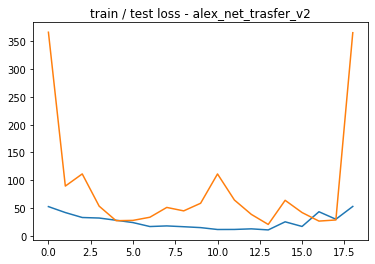

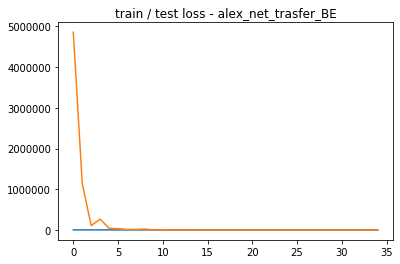

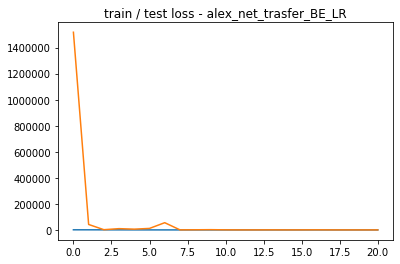

In [24]:
exec_methods = ["alex_net_trasfer_v2", "alex_net_trasfer_BE", "alex_net_trasfer_BE_LR"]
for method in exec_methods:
    train_model(method)

In [25]:
val_loss_dict

{'alex_net_trasfer_v2': 20.40282440185547,
 'alex_net_trasfer_BE': 24.46835708618164,
 'alex_net_trasfer_BE_LR': 42.72626495361328}

In [26]:
#, "alex_net_trasfer_v2", "alex_net_trasfer_BE", "alex_net_trasfer_BE_LR"